In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
data = pd.read_csv('play store data.csv')

In [8]:
data['Reviews'] = pd.to_numeric(data['Reviews'], errors='coerce')


In [12]:
data['Sentiment'] = data['Rating'].apply(categorize_sentiment)

In [9]:
filtered_data = data[data['Reviews'] > 1000]

In [10]:
def categorize_sentiment(rating):
    if rating <= 2:
        return 'Negative'
    elif rating <= 4:
        return 'Neutral'
    else:
        return 'Positive'

In [13]:
filtered_data.loc[:, 'Sentiment'] = filtered_data['Rating'].apply(categorize_sentiment)


In [18]:

sentiment_distribution = filtered_data.groupby(['Category', 'Sentiment']).size().unstack(fill_value=0)




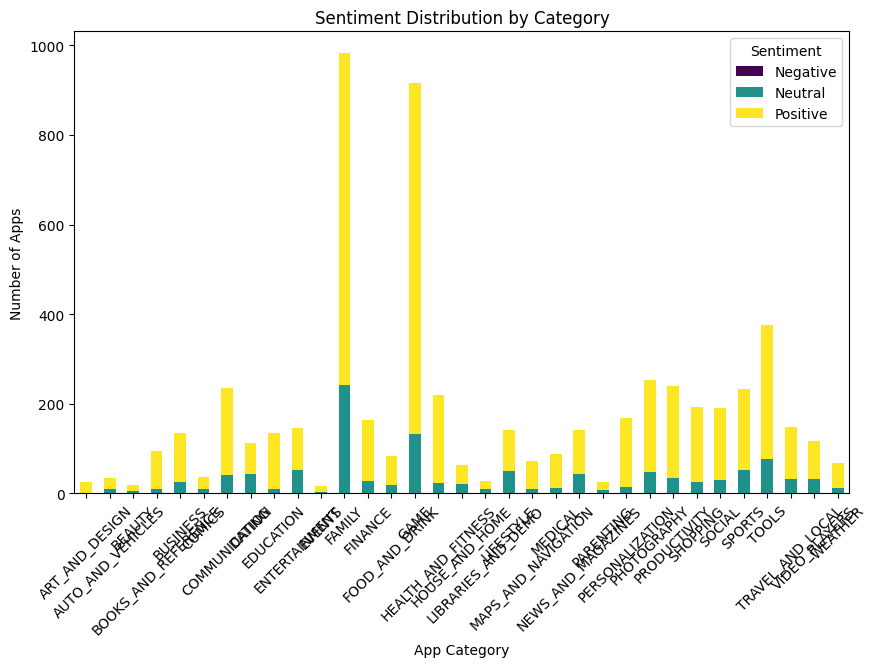

In [19]:

sentiment_distribution.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))

plt.title('Sentiment Distribution by Category')
plt.xlabel('App Category')
plt.ylabel('Number of Apps')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.show()
